In [1]:
# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import math

# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_selection import chi2

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy as sc
from scipy.stats import t

In [2]:
# Load the data
PATH = '/Users/amaellebidet/Desktop/Sensorimotor_neuroprosthetics/motion-tracking-triggered-ees/EMG_analysis/data/'
EMG1_FILE_NAME = 'sys1.csv'
EMG2_FILE_NAME = 'sys2.csv'
ANGLES_FILE_NAME = 'alex.csv'
angles_list = ["angle_1", "angle_2", "angle_3", "angle_4", "angle_5", "angle_6", "angle_7", "angle_8"]
muscles_list_1 = ["The", "FPL", "APL", "FD2", "Brach1", "FCR", "ECR", "PT", "FD34", "Brach2", "FCU", "ECU", "ED", "BBlg", "LatDor"]
muscles_list_2 = ["BBsh", "TBlg", "TBlat", "DELant", "DELmed", "DELpost", "PMcl", "PMst", "Infra", "Supra", "TRhigh", "TRmed"]
df_emg1 = pd.read_csv(PATH+EMG1_FILE_NAME, compression='infer', on_bad_lines='warn',names=muscles_list_1)
df_emg2 = pd.read_csv(PATH+EMG2_FILE_NAME, compression='infer', on_bad_lines='warn',names=muscles_list_2)
df_angles = pd.read_csv(PATH+ANGLES_FILE_NAME, compression='infer', on_bad_lines='warn',names=angles_list)


In [3]:
df_angles

,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8
0,-0.56164,-0.049700,0.049700,-0.049700,0.063262,-1.2861,0.016174,-0.77677
1,-0.56164,-0.049682,0.049682,-0.049682,0.063269,-1.2861,0.016169,-0.77676
2,-0.56164,-0.049664,0.049664,-0.049664,0.063277,-1.2861,0.016164,-0.77674
3,-0.56164,-0.049647,0.049647,-0.049647,0.063284,-1.2861,0.016160,-0.77673
4,-0.56164,-0.049630,0.049630,-0.049630,0.063291,-1.2861,0.016156,-0.77671
...,...,...,...,...,...,...,...,...
570996,-0.35861,0.251680,-0.251680,0.251680,0.035780,-1.2216,0.105070,-0.72036
570997,-0.35864,0.251780,-0.251780,0.251780,0.035442,-1.2216,0.105070,-0.72046
570998,-0.35866,0.251880,-0.251880,0.251880,0.035104,-1.2217,0.105070,-0.72056
570999,-0.35868,0.251970,-0.251970,0.251970,0.034778,-1.2217,0.105060,-0.72065


In [4]:
df_angles.drop(labels={'angle_3','angle_4'},axis=1, inplace=True)
df_angles

,angle_1,angle_2,angle_5,angle_6,angle_7,angle_8
0,-0.56164,-0.049700,0.063262,-1.2861,0.016174,-0.77677
1,-0.56164,-0.049682,0.063269,-1.2861,0.016169,-0.77676
2,-0.56164,-0.049664,0.063277,-1.2861,0.016164,-0.77674
3,-0.56164,-0.049647,0.063284,-1.2861,0.016160,-0.77673
4,-0.56164,-0.049630,0.063291,-1.2861,0.016156,-0.77671
...,...,...,...,...,...,...
570996,-0.35861,0.251680,0.035780,-1.2216,0.105070,-0.72036
570997,-0.35864,0.251780,0.035442,-1.2216,0.105070,-0.72046
570998,-0.35866,0.251880,0.035104,-1.2217,0.105070,-0.72056
570999,-0.35868,0.251970,0.034778,-1.2217,0.105060,-0.72065


In [5]:
df_emg1

,The,FPL,APL,FD2,Brach1,FCR,ECR,PT,FD34,Brach2,FCU,ECU,ED,BBlg,LatDor
0,0.012889,0.059114,0.028965,0.030858,0.045623,0.046895,0.062855,0.084812,0.039372,0.049902,0.10488,0.036791,0.068799,0.056631,0.044400
1,0.012898,0.059176,0.028972,0.030913,0.045737,0.047017,0.063045,0.084833,0.039389,0.049911,0.10538,0.036809,0.068817,0.056728,0.044569
2,0.012906,0.059232,0.028981,0.030971,0.045819,0.047141,0.063263,0.084850,0.039406,0.049920,0.10585,0.036829,0.068837,0.056823,0.044725
3,0.012914,0.059282,0.028992,0.031032,0.045875,0.047263,0.063521,0.084863,0.039425,0.049927,0.10624,0.036859,0.068859,0.056908,0.044840
4,0.012920,0.059325,0.029006,0.031092,0.045913,0.047382,0.063827,0.084875,0.039446,0.049935,0.10656,0.036898,0.068883,0.056987,0.044935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570996,0.026169,0.087419,0.078023,0.078149,0.061936,0.062429,0.140350,0.134740,0.483710,0.074602,0.18139,0.076372,0.098561,0.074249,0.204010
570997,0.026172,0.087426,0.078042,0.078130,0.062046,0.062492,0.140100,0.134650,0.483710,0.074537,0.18117,0.076377,0.098644,0.074394,0.204000
570998,0.026174,0.087411,0.078059,0.078107,0.062157,0.062542,0.139840,0.134520,0.483710,0.074458,0.18095,0.076398,0.098720,0.074541,0.204000
570999,0.026174,0.087372,0.078074,0.078078,0.062263,0.062578,0.139600,0.134340,0.483700,0.074369,0.18075,0.076430,0.098789,0.074691,0.204000


In [6]:
df_emg2

,BBsh,TBlg,TBlat,DELant,DELmed,DELpost,PMcl,PMst,Infra,Supra,TRhigh,TRmed
0,0.020598,0.17192,0.058715,0.059135,0.12588,0.092732,0.056051,0.021088,0.046171,0.13434,0.13013,0.023637
1,0.020601,0.17212,0.058723,0.059576,0.12733,0.093302,0.056339,0.021116,0.046311,0.13443,0.13041,0.023641
2,0.020605,0.17231,0.058735,0.060046,0.12878,0.093876,0.056619,0.021140,0.046456,0.13453,0.13070,0.023646
3,0.020609,0.17249,0.058756,0.060566,0.13023,0.094460,0.056882,0.021157,0.046606,0.13464,0.13101,0.023653
4,0.020616,0.17264,0.058794,0.061117,0.13159,0.095018,0.057125,0.021169,0.046752,0.13477,0.13136,0.023663
...,...,...,...,...,...,...,...,...,...,...,...,...
570996,0.028916,0.21982,0.065579,0.056616,0.13763,0.058093,0.253980,0.265240,0.045003,0.13615,0.15490,0.040596
570997,0.028944,0.21972,0.065539,0.056769,0.13769,0.058045,0.253980,0.265240,0.044920,0.13615,0.15486,0.040598
570998,0.028973,0.21955,0.065515,0.056909,0.13771,0.058008,0.253980,0.265240,0.044836,0.13615,0.15481,0.040601
570999,0.029002,0.21937,0.065496,0.057043,0.13771,0.057975,0.253990,0.265250,0.044753,0.13615,0.15475,0.040604


In [7]:
# Create Dataframe w/ angles and EMG
df_emg = pd.concat([df_emg1,df_emg2], axis=1)

In [8]:
df_emg.shape[1]

27

In [9]:
# bof 
# class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

IndentationError: unexpected indent (123608338.py, line 3)

In [9]:
#Model param
nb_angles = 6
nb_samples = len(df_angles)
nb_emg = 27
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
y=df_emg

# define model
model = LinearRegression()
# fit model
reg = model.fit(X,y)
beta_hat = [reg.intercept_] + reg.coef_.tolist()

### Angle 6: Elbow flexion

In [10]:
# ANGLE 6 make a prediction based on flexion coude
row = [0, 0, 0, 1, 0, 0]
yhat = model.predict([row])
# summarize prediction
print(yhat)
print(reg.coef_[:,3])

[[ 0.10748505  0.25285216  0.24223455  0.08804813  0.11124515  0.16151027
   0.63545496  0.43875908  0.15645637  0.41158389  0.2781892   0.41655331
   0.15460229  0.32785088 -0.00871399  0.78963101  0.20480689  0.07891297
   0.0557826   0.0916421   0.04524103  0.23183194  0.15423784  0.31220394
   0.33449782  0.27834363  0.21034185]]
[ 0.00145902  0.0612609   0.02619695  0.00886593 -0.08158734  0.02978612
  0.13871453  0.07192052  0.01270908  0.11965519  0.02717714  0.04459448
 -0.00801537  0.1122106  -0.03689731  0.15789746 -0.07343131 -0.0322042
 -0.02302952 -0.065509   -0.02947211 -0.00632644  0.00156509  0.01150456
 -0.00968373 -0.02850153  0.04379428]


In [11]:
#print('pvalues', model.p[:,3])

In [12]:
print(muscles_list_1,muscles_list_2)

['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']


#### Based on reg coeff & pvalues

For Angle 6 = flexion coude, 

Muscles not necessary: The,FD2,LatDor,PMcl,PMst,Supra

Too large pvalues >0.05 : FPL

--> Retrain model without them



In [13]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 20
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
y=df_emg.drop(labels={'FPL','The','FD2','LatDor','PMcl','PMst','Supra'},axis=1)

# define model
model_angle6 = LinearRegression()
# fit model
reg_angle6 = model_angle6.fit(X.angle_6.values.reshape(-1, 1),y)
beta_hat6 = [reg_angle6.intercept_] + reg_angle6.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle6 = model_angle6.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle6)
print("reg coefficients", reg_angle6.coef_.transpose())
#print('pvalues', model_angle6.p.transpose())

[[0.2357702  0.07509013 0.14123297 0.48331265 0.36524424 0.14442697
  0.30744656 0.23845558 0.34897552 0.10984105 0.42975083 0.63973858
  0.2436031  0.15187571 0.24854009 0.16792947 0.12042709 0.23557212
  0.30651786 0.2961041 ]]
reg coefficients [[ 0.05062237 -0.0861577   0.02577716  0.07360297  0.06045582  0.01721674
   0.07040868  0.00442528  0.04561757 -0.02323012  0.10254344  0.18692366
  -0.05106991 -0.01761108 -0.02949686 -0.01547301 -0.02609892 -0.00855924
  -0.03225597  0.06454937]]


 List of muscles edited : ['APL', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'Infra', 'TRhigh', 'TRmed']
 
 Unuseful muscles: FCU, Infra, FD34
 --> Retrain

In [14]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 16
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
y=df_emg.drop(labels={'Brach1','FPL','The','FD2','LatDor','PMcl','PMst','Supra','FCU','Infra','FD34'},axis=1)

# define model
model_angle6 = LinearRegression()
# fit model
reg_angle6 = model_angle6.fit(X.angle_6.values.reshape(-1, 1),y)
beta_hat6 = [reg_angle6.intercept_] + reg_angle6.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle6 = model_angle6.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle6)
print(reg_angle6.coef_.transpose())
#print('pvalues', model_angle6.p.transpose())

[[0.2357702  0.14123297 0.48331265 0.36524424 0.30744656 0.34897552
  0.10984105 0.42975083 0.63973858 0.2436031  0.15187571 0.24854009
  0.16792947 0.12042709 0.30651786 0.2961041 ]]
[[ 0.05062237  0.02577716  0.07360297  0.06045582  0.07040868  0.04561757
  -0.02323012  0.10254344  0.18692366 -0.05106991 -0.01761108 -0.02949686
  -0.01547301 -0.02609892 -0.03225597  0.06454937]]


In [15]:
print(np.sort(reg_angle6.coef_[:,0],axis=0))
print(np.argsort(reg_angle6.coef_[:,0],axis=0))

[-0.05106991 -0.03225597 -0.02949686 -0.02609892 -0.02323012 -0.01761108
 -0.01547301  0.02577716  0.04561757  0.05062237  0.06045582  0.06454937
  0.07040868  0.07360297  0.10254344  0.18692366]
[ 9 14 11 13  6 10 12  1  5  0  3 15  4  2  7  8]


In [16]:
reg_angle6.coef_[:,0]

array([ 0.05062237,  0.02577716,  0.07360297,  0.06045582,  0.07040868,
        0.04561757, -0.02323012,  0.10254344,  0.18692366, -0.05106991,
       -0.01761108, -0.02949686, -0.01547301, -0.02609892, -0.03225597,
        0.06454937])

 List of muscles edited :['APL', 'FCR', 'ECR', 'PT', 'Brach2', 'ECU', 'ED', 'BBlg'] 8 ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed' 'DELpost', 'TRhigh', 'TRmed']
 --> muscles with the largest reg coefficients in order : 
 
 positive: BBsh,BBlg, ECR, Brach2 --> seems coherent :) (then PT and TRmed)

 negative: TBlg --> seems coherent :) (then TRhigh,DELant)

#### Based on predictions

For Angle 6 = flexion coude, 
Muscles not necessary: FD2,LatDor,TBlat,DELant,DELmed,DELpost
--> Retrain model without them

In [18]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 21
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
y=df_emg.drop(labels={'FD2','LatDor','TBlat','DELant','DELmed','DELpost'},axis=1)

# define model
model_angle6 = LinearRegression()
# fit model
reg_angle6 = model_angle6.fit(X.angle_6.values.reshape(-1, 1),y)
beta_hat6 = [reg_angle6.intercept_] + reg_angle6.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle6 = model_angle6.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle6)

[[-0.05870011 -0.16868019 -0.14325206 -0.25500564 -0.09512044 -0.35541759
  -0.25869822 -0.1159893  -0.17780153 -0.2406356  -0.27203858 -0.16257335
  -0.24008624 -0.28723384 -0.35963178 -0.24969099 -0.13737702 -0.26419727
  -0.35285031 -0.38699725 -0.17791925]]


 List of muscles edited :['The', 'FPL', 'APL', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg'] 13['BBsh', 'TBlg', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']
 
 Unuseful muscles: The, Brach1
 --> Retrain

In [53]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 19
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
y=df_emg.drop(labels={'FD2','LatDor','TBlat','DELant','DELmed','DELpost','The','Brach1'},axis=1)

# define model
model_angle6 = LinearRegression()
# fit model
reg_angle6 = model_angle6.fit(X.angle_6.values.reshape(-1, 1),y)
beta_hat6 = [reg_angle6.intercept_] + reg_angle6.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle6 = model_angle6.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle6)

[[0.24272344 0.2357702  0.14123297 0.48331265 0.36524424 0.14442697
  0.30744656 0.23845558 0.34897552 0.10984105 0.42975083 0.63973858
  0.2436031  0.15908284 0.14036906 0.23557212 0.3654685  0.30651786
  0.2961041 ]]


 List of muscles edited :['FPL', 'APL', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg'] 11 ['BBsh', 'TBlg', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']

 --> muscles with the more activity: ECR,BBlg,BBsh --> seems coherent :)

### Angle 1: Abduction adduction shoulder

#### Based on reg coeff & pvalues

In [24]:
# make a prediction based on 
row = [1, 0, 0, 0, 0, 0]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])
print(reg.coef_[:,0])

[ 0.07018527  0.17053101  0.17812785  0.03825013  0.17773716  0.10436738
  0.45345058  0.32317327  0.10136683  0.27783102  0.15425855  0.2397143
  0.10934166  0.13818598  0.08581642  0.82759671  0.21256011  0.04285093
  0.16979848  0.10068278 -0.00398453  0.27094613  0.14417343  0.30466602
  0.35844396  0.36960133  0.11862308]
[-0.03584076 -0.02106025 -0.03790976 -0.04093207 -0.01509533 -0.02735677
 -0.04328986 -0.04366528 -0.04238046 -0.01409768 -0.0967535  -0.13224453
 -0.05327601 -0.07745431  0.0576331   0.19586317 -0.0656781  -0.06826624
  0.09098636 -0.05646832 -0.07869767  0.03278775 -0.00849932  0.00396664
  0.01426241  0.06275617 -0.04792449]


In [25]:
print(muscles_list_1,muscles_list_2)

['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']


In [26]:
print(np.sort(np.abs(reg.coef_[:,0]),axis=0))
print(np.argsort(np.abs(reg.coef_[:,0]),axis=0))

[0.00396664 0.00849932 0.01409768 0.01426241 0.01509533 0.02106025
 0.02735677 0.03278775 0.03584076 0.03790976 0.04093207 0.04238046
 0.04328986 0.04366528 0.04792449 0.05327601 0.05646832 0.0576331
 0.06275617 0.0656781  0.06826624 0.07745431 0.07869767 0.09098636
 0.0967535  0.13224453 0.19586317]
[23 22  9 24  4  1  5 21  0  2  3  8  6  7 26 12 19 14 25 16 17 13 20 18
 10 11 15]


For Angle 1 = Shoulder Abduction/Adduction, 

Muscles not necessary: Infra, PMst
--> Retrain model without them

In [27]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 24
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
#bad EMG data
y=df_emg.drop(labels={'FD34','PMst'},axis=1)
# unuseful muscles 
y=y.drop(labels={'Infra'},axis=1)

# define model
model_angle1 = LinearRegression()
# fit model
reg_angle1 = model_angle1.fit(X.angle_1.values.reshape(-1, 1),y)
beta_hat1 = [reg_angle1.intercept_] + reg_angle1.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle1 = model_angle1.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle1)

[[ 0.03338721  0.11219673  0.11251687  0.06950988  0.06886206  0.08145327
   0.23198386  0.23563717  0.17366442  0.15686576  0.05978133  0.0525317
   0.09353203  0.04145154  0.54691322  0.22012056 -0.0029636   0.03333402
   0.17354739  0.03622476  0.18244964  0.30736198  0.31679322  0.02593413]]


In [28]:
print(np.sort(np.abs(reg_angle1.coef_[:,0]),axis=0))
print(np.argsort(np.abs(reg_angle1.coef_[:,0]),axis=0))

[0.00258075 0.00753188 0.01120285 0.01347921 0.01393644 0.01836229
 0.01907787 0.02064827 0.02992855 0.03130574 0.03274522 0.04479224
 0.06101732 0.07068272 0.07162744 0.08063725 0.08997864 0.09233231
 0.10047739 0.11221556 0.11419117 0.12517805 0.15314057 0.16434337]
[ 8  5  7  0 18  2 21  3 22 20  1  9 11  6 15 19 12 23  4 13 16 10 14 17]


 List of muscles edited :['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Supra', 'TRhigh', 'TRmed']
 
 Unuseful muscles: Brach2, FCR, PT, The

 --> Retrain

 Most useful: DELmed, TBlg, ECU, DELant


In [29]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 24
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
# unuseful muscles 
y=y.drop(labels={'Brach2', 'FCR', 'PT', 'The'},axis=1)

# define model
model_angle1 = LinearRegression()
# fit model
reg_angle1 = model_angle1.fit(X.angle_1.values.reshape(-1, 1),y)
beta_hat1 = [reg_angle1.intercept_] + reg_angle1.coef_.tolist()

# ANGLE 6 make a prediction based on flexion coude
row = np.array([1])
yhat_angle1 = model_angle1.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle1)


[[ 0.11219673  0.11251687  0.06950988  0.06886206  0.23198386  0.15686576
   0.05978133  0.0525317   0.09353203  0.04145154  0.54691322  0.22012056
  -0.0029636   0.03333402  0.17354739  0.03622476  0.18244964  0.30736198
   0.31679322  0.02593413]]


In [30]:
print(np.sort(reg_angle1.coef_[:,0],axis=0))
print(np.argsort(reg_angle1.coef_[:,0],axis=0))

[-0.16434337 -0.12517805 -0.11419117 -0.11221556 -0.10047739 -0.09233231
 -0.08997864 -0.08063725 -0.07162744 -0.07068272 -0.06101732 -0.04479224
 -0.03274522 -0.03130574 -0.02992855 -0.02064827 -0.01907787 -0.01836229
 -0.01393644  0.15314057]
[13  6 12  9  3 19  8 15 11  4  7  5  0 16 18  2 17  1 14 10]


['FPL', 'APL', 'FD2', 'Brach1', 'ECR', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Supra', 'TRhigh', 'TRmed']

Most useful positive: BBsh
Most useful negative: DELant, ECU, TBlat, LatDor

In [31]:
print(df_angles.angle_1.max())
print(df_angles.angle_1.min())

-0.16605
-1.4617


### Angle 2: Shoulder rotation

#### Based on reg coeff & pvalues

In [32]:
# make a prediction based on 
row = [0, 1, 0, 0, 0, 0]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])
print(reg.coef_[:,1])

[0.09839208 0.16696839 0.26734773 0.07471774 0.2162607  0.12730658
 0.40832653 0.34749066 0.15022822 0.19245877 0.23057333 0.42090348
 0.16079455 0.22229814 0.12894761 0.63044314 0.33233963 0.18015426
 0.13238246 0.2421268  0.09160807 0.19287126 0.16089634 0.28683474
 0.39065257 0.31177976 0.24116409]
[-0.00763395 -0.02462287  0.05131013 -0.00446446  0.02342821 -0.00441757
 -0.08841391 -0.0193479   0.00648093 -0.09946993 -0.02043873  0.04894465
 -0.00182312  0.00665785  0.10076429 -0.00129041  0.05410143  0.0690371
  0.05357034  0.0849757   0.01689494 -0.04528712  0.0082236  -0.01386464
  0.04647101  0.0049346   0.07461652]


In [33]:
print(muscles_list_1,muscles_list_2)

['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']


In [34]:
print(np.sort(np.abs(reg.coef_[:,1]),axis=0))
print(np.argsort(np.abs(reg.coef_[:,1]),axis=0))

[0.00129041 0.00182312 0.00441757 0.00446446 0.0049346  0.00648093
 0.00665785 0.00763395 0.0082236  0.01386464 0.01689494 0.0193479
 0.02043873 0.02342821 0.02462287 0.04528712 0.04647101 0.04894465
 0.05131013 0.05357034 0.05410143 0.0690371  0.07461652 0.0849757
 0.08841391 0.09946993 0.10076429]
[15 12  5  3 25  8 13  0 22 23 20  7 10  4  1 21 24 11  2 18 16 17 26 19
  6  9 14]


For Angle 2 = Shoulder Rotation, 

Muscles not necessary: BBsh, ED, FCR, FD2, TRhigh, FD34, BBlg, The
--> Retrain model without them

In [35]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 18
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
# bad EMG data
y=df_emg.drop(labels={'FD34','PMst'},axis=1)
# unuseful muscles 
y=y.drop(labels={'BBsh','ED','FCR','FD2','TRhigh','BBlg','The'},axis=1)

# define model
model_angle2 = LinearRegression()
# fit model
reg_angle2 = model_angle2.fit(X.angle_2.values.reshape(-1, 1),y)
beta_hat2 = [reg_angle2.intercept_] + reg_angle2.coef_.tolist()

# ANGLE 2 make a prediction based on flexion coude
row = np.array([1])
yhat_angle2 = model_angle2.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle2)

[[0.15966561 0.20206014 0.15119652 0.29824191 0.28061832 0.15945735
  0.21897766 0.28428733 0.20276809 0.32959212 0.17201443 0.19664474
  0.25727735 0.15194531 0.15212187 0.19047266 0.36320808 0.2174345 ]]


In [36]:
print(df_angles.angle_2.max())
print(df_angles.angle_2.min())

0.8913
-0.64971


In [41]:
print(np.sort(reg_angle2.coef_[:,0],axis=0))
print(np.argsort(reg_angle2.coef_[:,0],axis=0))

[-0.09687595 -0.07520749 -0.07451313 -0.05552223 -0.04529766 -0.02070144
 -0.01682486 -0.01505868 -0.0111917  -0.01034332 -0.00728012 -0.00567976
  0.01756243  0.02241341  0.02428215  0.03658987  0.05423171  0.05554925]
[11  2 14 15  3  8  5 13 10  6  9  0  7 16  4 17  1 12]


['FPL', 'APL', 'Brach1', 'ECR', 'PT', 'Brach2', 'FCU', 'ECU', 'LatDor'] ['TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRmed']

Muscles mostly active:

Positive: DELmed, APL, TRmed, PT

Negative: DELant, Brach1, PMcl

Unuseful muscles:
0,9
FPL, TBlg --> retrain without them

In [42]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 16
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles

# unuseful muscles 
y=y.drop(labels={'FPL','TBlg'},axis=1)

# define model
model_angle2 = LinearRegression()
# fit model
reg_angle2 = model_angle2.fit(X.angle_2.values.reshape(-1, 1),y)
beta_hat2 = [reg_angle2.intercept_] + reg_angle2.coef_.tolist()

# ANGLE 2 make a prediction based on flexion coude
row = np.array([1])
yhat_angle2 = model_angle2.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle2)

[[0.20206014 0.15119652 0.29824191 0.28061832 0.15945735 0.21897766
  0.28428733 0.20276809 0.17201443 0.19664474 0.25727735 0.15194531
  0.15212187 0.19047266 0.36320808 0.2174345 ]]


['APL', 'Brach1', 'ECR', 'PT', 'Brach2', 'FCU', 'ECU', 'LatDor'] ['TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRmed']

In [43]:
print(np.sort(reg_angle2.coef_[:,0],axis=0))
print(np.argsort(reg_angle2.coef_[:,0],axis=0))

[-0.09687595 -0.07520749 -0.07451313 -0.05552223 -0.04529766 -0.02070144
 -0.01682486 -0.01505868 -0.0111917  -0.01034332  0.01756243  0.02241341
  0.02428215  0.03658987  0.05423171  0.05554925]
[ 9  1 12 13  2  7  4 11  8  5  6 14  3 15  0 10]


Muscles mostly active:

Positive: DELmed, APL, TRmed, PT

Negative: DELant, Brach1, PMcl

### Angle 5: Shoulder flexion/extension

#### Based on reg coeff & pvalues

In [44]:
# make a prediction based on 
row = [0, 0, 1, 0, 0, 0]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])
print(reg.coef_[:,2])

[0.10239121 0.19605926 0.23075007 0.04602545 0.30321766 0.11947815
 0.55774757 0.34659248 0.10528094 0.2340503  0.22632545 0.44221961
 0.20701865 0.18363873 0.19584094 0.70735881 0.27193328 0.18757019
 0.32790134 0.10155187 0.01488137 0.32525958 0.16190873 0.39680388
 0.37901475 0.39633717 0.24351408]
[-0.00363483  0.004468    0.01471246 -0.03315675  0.11038518 -0.012246
  0.06100713 -0.02024607 -0.03846635 -0.0578784  -0.02468661  0.07026078
  0.04440099 -0.03200156  0.16765762  0.07562526 -0.00630493  0.07645302
  0.24908922 -0.05559923 -0.05983177  0.0871012   0.00923598  0.0961045
  0.03483319  0.08949201  0.07696651]


In [45]:
print(muscles_list_1,muscles_list_2)

['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']


In [46]:
print(np.sort(np.abs(reg.coef_[:,2]),axis=0))
print(np.argsort(np.abs(reg.coef_[:,2]),axis=0))

[0.00363483 0.004468   0.00630493 0.00923598 0.012246   0.01471246
 0.02024607 0.02468661 0.03200156 0.03315675 0.03483319 0.03846635
 0.04440099 0.05559923 0.0578784  0.05983177 0.06100713 0.07026078
 0.07562526 0.07645302 0.07696651 0.0871012  0.08949201 0.0961045
 0.11038518 0.16765762 0.24908922]
[ 0  1 16 22  5  2  7 10 13  3 24  8 12 19  9 20  6 11 15 17 26 21 25 23
  4 14 18]


For Angle 5 = Shoulder Flexion/Extension, 

Muscles not necessary: The, FPL, TBlg, PMst, FCR, APL
--> Retrain model without them

In [48]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 20
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
# bad EMG data
y=df_emg.drop(labels={'FD34','PMst'},axis=1)
# unuseful muscles 
y=y.drop(labels={'The','FPL','TBlg','FCR','APL'},axis=1)

# define model
model_angle5 = LinearRegression()
# fit model
reg_angle5 = model_angle5.fit(X.angle_5.values.reshape(-1, 1),y)
beta_hat5 = [reg_angle5.intercept_] + reg_angle5.coef_.tolist()

# ANGLE 2 make a prediction based on flexion coude
row = np.array([1])
yhat_angle5 = model_angle5.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle5)

[[0.09977787 0.26017186 0.36587287 0.2519553  0.17072702 0.23054515
  0.28620001 0.16525151 0.24316891 0.26043082 0.29468716 0.20518097
  0.35682746 0.18657685 0.16527046 0.25195168 0.27499958 0.34495584
  0.38315374 0.19610458]]


In [49]:
print(df_angles.angle_5.max())
print(df_angles.angle_5.min())

2.0383
-0.075106


In [50]:
print(np.sort(reg_angle5.coef_[:,0],axis=0))
print(np.argsort(reg_angle5.coef_[:,0],axis=0))

[-0.04051187 -0.02956801 -0.01480523 -0.01310739 -0.0084614  -0.004603
  0.00095677  0.00864352  0.02602958  0.05224538  0.0712919   0.07418896
  0.0749349   0.07741351  0.08620405  0.08727036  0.09765892  0.10951573
  0.14425096  0.22277169]
[13  4  0 14  3 10  5  8 17  7 18  2 15 19 11  6 16  1  9 12]


['FD2', 'Brach1', 'ECR', 'PT', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRhigh', 'TRmed']

coherent that DELpost has little contraction percentage because the range of ALEX exoskeletton doesn't allow for a real extension of the shoulder towards the back (min = -0.075106)

Muscles mostly active:

Positive: DELant, LatDor, Brach1, TRmed, ECU, 

Negative: DELmed, Brach2, FD2, DELpost

Unuseful muscles:
3 10  5  8 
PT, BBsh,FCU, BBlg
--> retrain without them

In [51]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 16
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
# unuseful muscles 
y=y.drop(labels={'PT','BBsh','FCU','BBlg'},axis=1)

# define model
model_angle5 = LinearRegression()
# fit model
reg_angle5 = model_angle5.fit(X.angle_5.values.reshape(-1, 1),y)
beta_hat5 = [reg_angle5.intercept_] + reg_angle5.coef_.tolist()

# ANGLE 2 make a prediction based on flexion coude
row = np.array([1])
yhat_angle5 = model_angle5.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle5)

[[0.09977787 0.26017186 0.36587287 0.17072702 0.28620001 0.16525151
  0.26043082 0.20518097 0.35682746 0.18657685 0.16527046 0.25195168
  0.27499958 0.34495584 0.38315374 0.19610458]]


In [53]:
print(np.sort(reg_angle5.coef_[:,0],axis=0))
print(np.argsort(reg_angle5.coef_[:,0],axis=0))

[-0.04051187 -0.02956801 -0.01480523 -0.01310739  0.02602958  0.05224538
  0.0712919   0.07418896  0.0749349   0.07741351  0.08620405  0.08727036
  0.09765892  0.10951573  0.14425096  0.22277169]
[ 9  3  0 10 13  5 14  2 11 15  7  4 12  1  6  8]


['FD2', 'Brach1', 'ECR', 'Brach2', 'ECU', 'ED', 'LatDor'] ['TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRhigh', 'TRmed']

Muscles mostly active:

Positive: DELant, LatDor, Brach1, PMcl

Negative: DELmed, Brach2

### Angle 7: Prosupination forearm/wrist

#### Based on reg coeff & pvalues

In [54]:
# make a prediction based on 
row = [0, 0, 0, 0, 1, 0]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])
print(reg.coef_[:,5])

[ 0.1215321   0.17332487  0.2080939   0.07165965  0.18202692  0.13443743
  0.51867162  0.35705397  0.15953895  0.23424448  0.30230541  0.3880887
  0.19983043  0.12396954 -0.03184902  0.57378173  0.2254264   0.10370199
  0.01585138  0.10466769 -0.02063371  0.27593392  0.15159822  0.24712463
  0.29950231  0.28952177  0.14031685]
[ 0.08084526  0.00028884  0.10636464 -0.03429384  0.15395681  0.02576038
  0.13367361  0.08839969  0.01482608  0.01205224  0.0301237   0.24654251
  0.08886907 -0.07655909 -0.07970846  0.19671955  0.06766821  0.06470445
 -0.07019845  0.02642905 -0.0379371   0.05648391  0.03970943  0.16446376
  0.05395604 -0.00187011  0.05511155]


In [55]:
print(muscles_list_1,muscles_list_2)

['The', 'FPL', 'APL', 'FD2', 'Brach1', 'FCR', 'ECR', 'PT', 'FD34', 'Brach2', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'PMst', 'Infra', 'Supra', 'TRhigh', 'TRmed']


In [56]:
print(np.sort(np.abs(reg.coef_[:,5]),axis=0))
print(np.argsort(np.abs(reg.coef_[:,5]),axis=0))

[0.00028884 0.00187011 0.01205224 0.01482608 0.02576038 0.02642905
 0.0301237  0.03429384 0.0379371  0.03970943 0.05395604 0.05511155
 0.05648391 0.06470445 0.06766821 0.07019845 0.07655909 0.07970846
 0.08084526 0.08839969 0.08886907 0.10636464 0.13367361 0.15395681
 0.16446376 0.19671955 0.24654251]
[ 1 25  9  8  5 19 10  3 20 22 24 26 21 17 16 18 13 14  0  7 12  2  6  4
 23 15 11]


For Angle 7 = Prosupination forearm/wrist, 

Muscles not necessary: FPL, TRhigh, Brach2, FD34, FCR, DELmed
--> Retrain model without them

In [58]:
#Model param
nb_angles = 1
nb_samples = len(df_angles)
nb_emg = 20
n_features=nb_angles
n_informative=nb_angles
n_targets=nb_emg

X=df_angles
# bad EMG data
y=df_emg.drop(labels={'FD34','PMst'},axis=1)
# unuseful muscles 
y=y.drop(labels={'FPL','TRhigh','Brach2','FCR', 'DELmed'},axis=1)

# define model
model_angle7 = LinearRegression()
# fit model
reg_angle7 = model_angle7.fit(X.angle_7.values.reshape(-1, 1),y)
beta_hat7 = [reg_angle7.intercept_] + reg_angle7.coef_.tolist()

# ANGLE 2 make a prediction based on flexion coude
row = np.array([1])
yhat_angle7 = model_angle7.predict(row.reshape(1, -1))
# summarize prediction
print(yhat_angle7)

[[0.03344046 0.08824647 0.08556202 0.09634235 0.24210365 0.20130339
  0.22003294 0.08882998 0.10305798 0.08405813 0.09635027 0.31788922
  0.21614299 0.0579476  0.11458378 0.02388801 0.21939882 0.07464438
  0.26990608 0.04936312]]


In [59]:
print(np.sort(reg_angle7.coef_[:,0],axis=0))
print(np.argsort(reg_angle7.coef_[:,0],axis=0))

[-0.13734534 -0.12891525 -0.12857498 -0.11456888 -0.1054812  -0.10016595
 -0.09420387 -0.09337678 -0.09218051 -0.08860186 -0.07718515 -0.05015633
 -0.03967913 -0.03845605 -0.03613753 -0.01608853 -0.01299215 -0.01049551
 -0.00750116  0.01611546]
[14 17  7  9 15  3 10 19 13 12  4 18  1  5  8  0  2 16  6 11]


['The', 'APL', 'FD2', 'Brach1', 'ECR', 'PT', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor'] ['BBsh', 'TBlg', 'TBlat', 'DELant', 'DELpost', 'PMcl', 'Infra', 'Supra','TRmed']

Muscles mostly active:

Positive: BBsh

Negative: DELant, Infra, ECU

Unuseful muscles:
...
--> retrain without them

## Plot

In [105]:
data6 = pd.DataFrame(data={'Muscle': ['APL', 'FCR', 'ECR', 'PT', 'Brach2', 'ECU', 'ED', 'BBlg','BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'TRhigh', 'TRmed'],
        'Contraction': [reg_angle6.coef_[:,0][0], reg_angle6.coef_[:,0][1],reg_angle6.coef_[:,0][2],reg_angle6.coef_[:,0][3],
        reg_angle6.coef_[:,0][4],reg_angle6.coef_[:,0][5],reg_angle6.coef_[:,0][6],reg_angle6.coef_[:,0][7],
        reg_angle6.coef_[:,0][8],reg_angle6.coef_[:,0][9],reg_angle6.coef_[:,0][10],reg_angle6.coef_[:,0][11],
        reg_angle6.coef_[:,0][12],reg_angle6.coef_[:,0][13],reg_angle6.coef_[:,0][14],reg_angle6.coef_[:,0][15]]})

data6

,Muscle,Contraction
0,APL,0.050622
1,FCR,0.025777
2,ECR,0.073603
3,PT,0.060456
4,Brach2,0.070409
5,ECU,0.045618
6,ED,-0.023230
7,BBlg,0.102543
8,BBsh,0.186924
9,TBlg,-0.051070


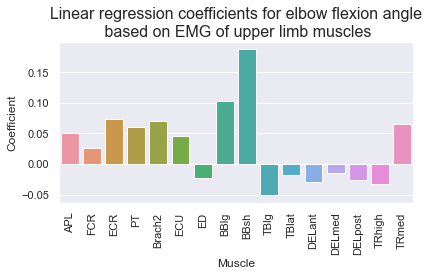

In [152]:
sns.color_palette('dark')
plt.xticks(rotation=90)
sns.barplot(x='Muscle', y='Contraction',data=data6)
plt.ylabel('Coefficient')
plt.title('Linear regression coefficients for elbow flexion angle\n based on EMG of upper limb muscles', fontsize=16)
plt.tight_layout()

In [128]:
data1 = pd.DataFrame(data={'Muscle': ['FPL', 'APL', 'FD2', 'Brach1', 'ECR', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor','BBsh', 'TBlg', 'TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Supra', 'TRhigh', 'TRmed'],
        'Contraction': [-reg_angle1.coef_[:,0][0], -reg_angle1.coef_[:,0][1],-reg_angle1.coef_[:,0][2],-reg_angle1.coef_[:,0][3],
        -reg_angle1.coef_[:,0][4],-reg_angle1.coef_[:,0][5],-reg_angle1.coef_[:,0][6],-reg_angle1.coef_[:,0][7],
        -reg_angle1.coef_[:,0][8],-reg_angle1.coef_[:,0][9],-reg_angle1.coef_[:,0][10],-reg_angle1.coef_[:,0][11],
        -reg_angle1.coef_[:,0][12],-reg_angle1.coef_[:,0][13],-reg_angle1.coef_[:,0][14],-reg_angle1.coef_[:,0][15],
        -reg_angle1.coef_[:,0][16],-reg_angle1.coef_[:,0][17],-reg_angle1.coef_[:,0][18],-reg_angle1.coef_[:,0][19]]})

data1

,Muscle,Contraction
0,FPL,0.032745
1,APL,0.018362
2,FD2,0.020648
3,Brach1,0.100477
4,ECR,0.070683
5,FCU,0.044792
6,ECU,0.125178
7,ED,0.061017
8,BBlg,0.089979
9,LatDor,0.112216


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

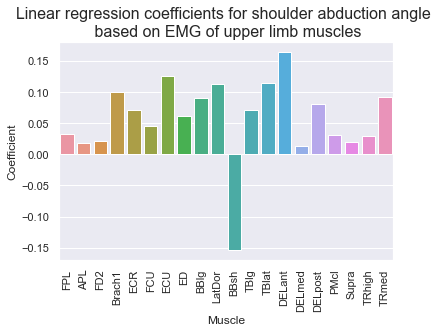

In [151]:
sns.color_palette('dark')

plt.xticks(rotation=90)
sns.barplot(x='Muscle', y='Contraction',data=data1)
plt.ylabel('Coefficient')
plt.title('Linear regression coefficients for shoulder abduction angle \n based on EMG of upper limb muscles', fontsize=16)
plt.tight_layout

In [158]:
data2 = pd.DataFrame(data={'Muscle': ['APL', 'Brach1', 'ECR', 'PT', 'Brach2', 'FCU', 'ECU', 'LatDor','TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRmed'],
        'Contraction': [reg_angle2.coef_[:,0][0], reg_angle2.coef_[:,0][1],reg_angle2.coef_[:,0][2],reg_angle2.coef_[:,0][3],
        reg_angle2.coef_[:,0][4],reg_angle2.coef_[:,0][5],reg_angle2.coef_[:,0][6],reg_angle2.coef_[:,0][7],
        reg_angle2.coef_[:,0][8],reg_angle2.coef_[:,0][9],reg_angle2.coef_[:,0][10],reg_angle2.coef_[:,0][11],
        reg_angle2.coef_[:,0][12],reg_angle2.coef_[:,0][13],reg_angle2.coef_[:,0][14],reg_angle2.coef_[:,0][15]]})

data2

,Muscle,Contraction
0,APL,0.054232
1,Brach1,-0.075207
2,ECR,-0.045298
3,PT,0.024282
4,Brach2,-0.016825
5,FCU,-0.010343
6,ECU,0.017562
7,LatDor,-0.020701
8,TBlat,-0.011192
9,DELant,-0.096876


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

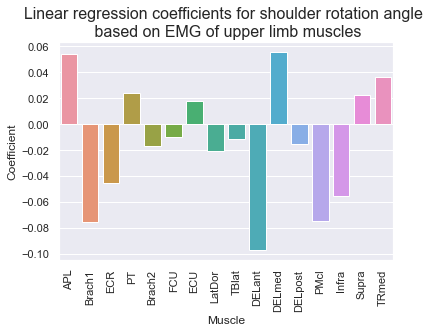

In [159]:
sns.color_palette('dark')

plt.xticks(rotation=90)
sns.barplot(x='Muscle', y='Contraction',data=data2)
plt.ylabel('Coefficient')
plt.title('Linear regression coefficients for shoulder rotation angle \n based on EMG of upper limb muscles', fontsize=16)
plt.tight_layout

In [160]:
data5 = pd.DataFrame(data={'Muscle': ['FD2', 'Brach1', 'ECR', 'Brach2', 'ECU', 'ED', 'LatDor','TBlat', 'DELant', 'DELmed', 'DELpost', 'PMcl', 'Infra', 'Supra', 'TRhigh', 'TRmed'],
        'Contraction': [reg_angle5.coef_[:,0][0], reg_angle5.coef_[:,0][1],reg_angle5.coef_[:,0][2],reg_angle5.coef_[:,0][3],
        reg_angle5.coef_[:,0][4],reg_angle5.coef_[:,0][5],reg_angle5.coef_[:,0][6],reg_angle5.coef_[:,0][7],
        reg_angle5.coef_[:,0][8],reg_angle5.coef_[:,0][9],reg_angle5.coef_[:,0][10],reg_angle5.coef_[:,0][11],
        reg_angle5.coef_[:,0][12],reg_angle5.coef_[:,0][13],reg_angle5.coef_[:,0][14],reg_angle5.coef_[:,0][15]]})

data5

,Muscle,Contraction
0,FD2,-0.014805
1,Brach1,0.109516
2,ECR,0.074189
3,Brach2,-0.029568
4,ECU,0.087270
5,ED,0.052245
6,LatDor,0.144251
7,TBlat,0.086204
8,DELant,0.222772
9,DELmed,-0.040512


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

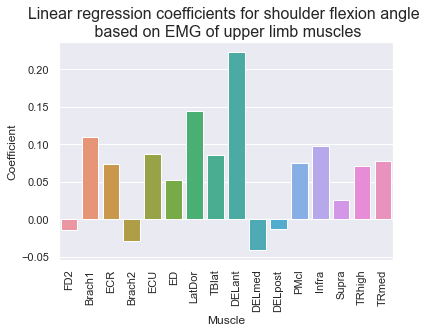

In [161]:
sns.color_palette('dark')

plt.xticks(rotation=90)
sns.barplot(x='Muscle', y='Contraction',data=data5)
plt.ylabel('Coefficient')
plt.title('Linear regression coefficients for shoulder flexion angle \n based on EMG of upper limb muscles', fontsize=16)
plt.tight_layout

In [169]:
data7 = pd.DataFrame(data={'Muscle': ['The', 'APL', 'FD2', 'Brach1', 'ECR', 'PT', 'FCU', 'ECU', 'ED', 'BBlg', 'LatDor','BBsh', 'TBlg', 'TBlat', 'DELant', 'DELpost', 'PMcl', 'Infra', 'Supra','TRmed'],
        'Contraction': [-reg_angle7.coef_[:,0][0], -reg_angle7.coef_[:,0][1],-reg_angle7.coef_[:,0][2],-reg_angle7.coef_[:,0][3],
        -reg_angle7.coef_[:,0][4],-reg_angle7.coef_[:,0][5],-reg_angle7.coef_[:,0][6],-reg_angle7.coef_[:,0][7],
        -reg_angle7.coef_[:,0][8],-reg_angle7.coef_[:,0][9],-reg_angle7.coef_[:,0][10],-reg_angle7.coef_[:,0][11],
        -reg_angle7.coef_[:,0][12],-reg_angle7.coef_[:,0][13],-reg_angle7.coef_[:,0][14],-reg_angle7.coef_[:,0][15],
        -reg_angle7.coef_[:,0][16],-reg_angle7.coef_[:,0][17],-reg_angle7.coef_[:,0][18],-reg_angle7.coef_[:,0][19]]})

data7

,Muscle,Contraction
0,The,0.016089
1,APL,0.039679
2,FD2,0.012992
3,Brach1,0.100166
4,ECR,0.077185
5,PT,0.038456
6,FCU,0.007501
7,ECU,0.128575
8,ED,0.036138
9,BBlg,0.114569


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

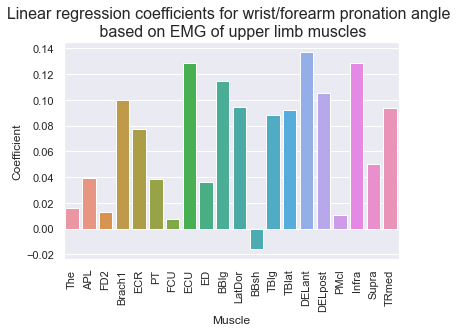

In [171]:
sns.color_palette('dark')

plt.xticks(rotation=90)
sns.barplot(x='Muscle', y='Contraction',data=data7)
plt.ylabel('Coefficient')
plt.title('Linear regression coefficients for wrist/forearm pronation angle \n based on EMG of upper limb muscles', fontsize=16)
plt.tight_layout